<a href="https://colab.research.google.com/github/ricardomj0499/IA-Investgacion-DBSCAN/blob/dev/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigación IA
# DBSCAN Clustering o Density-Based Spatial Clustering of Applications with Noise
# Ricardo Murillo Jiménez 2018173697
# Ronald Esquivel López 2018093269

# ¿Qué tipo de algoritmo es el DBSCAN dentro del Machine Learning?

Dentro de lo que es el mundo del machine learning, existen muchos algoritmos, por lo que estos se pueden separar, en varias 'familias'; como se puede observar en la imagen 1.

El DSCAN cae dentro del tipo Clustering Que a la vez es un algoritmo no supervisado.


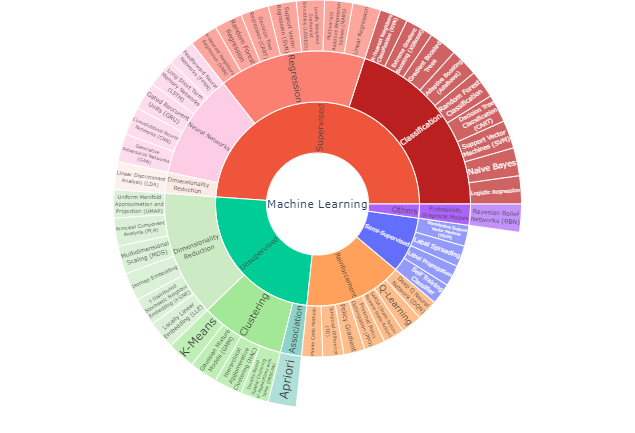

Imagen obtenida de: [9-Towards Data Science](https://towardsdatascience.com/dbscan-clustering-algorithm-how-to-build-powerful-density-based-models-21d9961c4cec)

# ¿Qué es el clustering?

En este caso el clustering se ve como un metodo de aprendizaje no supervisado en el cual se dividen "puntos de datos" en varios grupos o lotes. Estos grupos de caracterizan por tener propiedades similares; teniendo así caracterisiticas diferenciadoras con los otros grupos. A estos grupos-lotes es lo que se le conoce como "Clusters".[6]

Tipos de clustering[9]

* Centroid-base: O basado en centroides, usa la distancia euclidiana en cada punto de datos para asignar el cluster más cercano. **K-Means**

* Connectivity-based: O clustering basado en conectividad; Acá se asume que los puntos que esten más cercanos están más relacionados que los puntos alejados.**Hierarchical Agglomerative Clustering (HAC)**

* Density-based: basados en densidad. Define los clusters o grupos basados en regiones de densidad que se separan por regiones de menor densidad.**DBSCAN**

*  Distribution-based: O basados en distribución; asume la existencia de un número especificado de distribuciones. En la que cada distribución posee su propia media, variazana y covarianza. **Gaussian Mixture Models (GMM)**


# ¿Qué es la densidad?

[8]- Par entender mejor el algoritmo, hay que saber que es la densidad, en física se entiende como la cantidad de materia presente en una unidad de volumen.

Así, por poner un ejemplo, si se tienen dos cuadros de terrenos de 10m^{2} cada uno; el primero con 7 personas, el segundo con 3, podemos decir el que el primero tiene más densidad que el segundo.

Bajo esta idea es que funciona el DBSCAN para hacer los grupos de puntos de datos del conjunto de datos.

# Parametros del Algoritmo

[8]- Epsilon: Es una medidad de los grupos o clusters.

Neighbourhood: Dado un punto en la representación del conjunto de datos, dibujamos un circulo alrededor de ese punto con radio epsilon.

A este circulo le llamaremos Neighbourhood o cluster.

min_sample: Es la cantidad mínima de puntos de datos pertenecientes al conjunto que se ocupan para crear un cluster.

# Como funciona el algoritmo DBSCAN clustering?

# ¿Por qué DBSCAN frente a otros algoritmos?

# Ejemplo Práctico

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


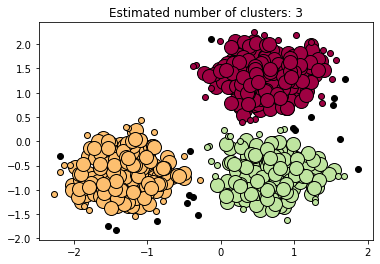

In [ ]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Referencias

# links
[1-SKlearn Sci kit](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

[2-SKlearn Sci kit](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)

[3-SKlearn Sci kit](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)

[4-SKlearn Otros ejemplos](https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html)

[5-Presentación Eplicación](https://elvex.ugr.es/idbis/dm/slides/43%20Clustering%20-%20Density.pdf)

[6-Geek For Geeks](https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/)

[7-Comparación Algoritmos ](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)

[8-Terminos importantes](https://www.analyticsvidhya.com/blog/2021/06/understand-the-dbscan-clustering-algorithm/)

[9-Ejemplos 3d](https://towardsdatascience.com/dbscan-clustering-algorithm-how-to-build-powerful-density-based-models-21d9961c4cec)

